## EE 242 Lab 2b – Convolution - Denoising audio signals

**Grace Hwang, Henry Bodrick, Anna Petrobokova, Leonard Paya** 

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, and matplotlib.pyplot.  

In [14]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib inline
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt

import scipy.io.wavfile as wav
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of convolution and smoothing on the sound of the signals.

## Lab 2b turn in checklist

• Lab 2b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 2 -- Smoothing Signals

In this assignment, we’ll implement a moving window smoothing function to show how you can use convolution to remove noise from a signal. We’ll use a discrete signal associated with a sampling period, and plot signals as if they were continuous to make it easier to see the effect of smoothing. The base signal is generated randomly, so you can run the cell multiple times to see how the results look for different signals.  This assignment will have three parts, A-C.

**A.**  Using the starter code provided, create a base time signal and a noisy version of it by adding random noise generated with the numpy.random.randn() function (the standard normal distribution, which is zero mean and unit variance). Plot the original and noisy signals with 2x1 subplots, with the time axis labeled assuming a sampling rate of 1000 Hz. Constrain the y-axis to be [0,25] for all plots. 

**B.**  Create a smoothed version of the signal called filtsig1 by computing the average value over a +/- k samples using the numpy.mean() function and k=20. You will need to make a decision as to how to handle the first and last k samples, for which there won’t be a full k samples available in both directions. In a single plot, plot the noisy signal and the filtered signal overlaid on the original signal.

**C.**  Define a vector hfilt that corresponds to box of length N=2k+1 and height 1/N. Create a second smoothed version of the signal called filtsig2 by convolving the base signal with hfilt using the numpy.convolve() function. Plot the two different filtered signal outputs overlaid on each other. Note that the convolve function will change the length, so you will need to define a new time vector for that. 



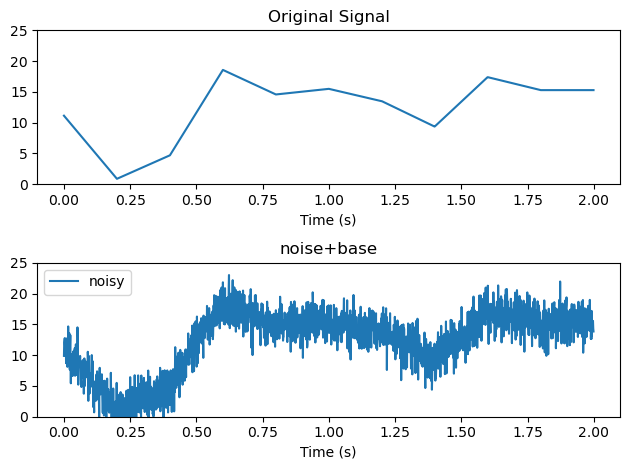

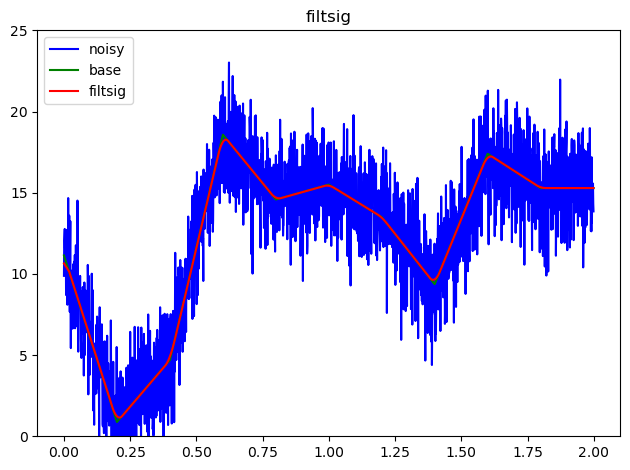

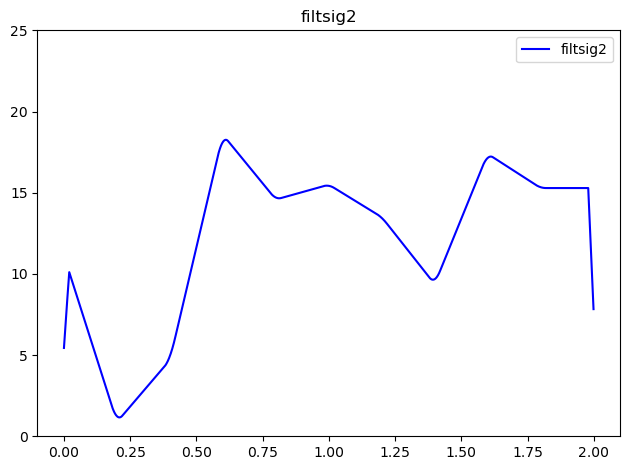

In [15]:
# Assignment 2 - Smoothing Signals


# set up relevant parameters
srate = 1000 # sampling rate in Hz
time = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p = 10 # points for piecewise linear signal
amp = 20 # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the above base signals
noiseamp = 2
noise = noiseamp * np.random.randn(n)

# Part A
# Add noise to the base signals to create new noisy signals (this is just adding two signals)
noisy=base+noise
plt.figure()
plt.subplot(2,1,1)
plt.plot(time,base)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylim(0,25)

plt.subplot(2,1,2)
plt.plot(time,noisy, label="noisy")
plt.title("noise+base")
plt.xlabel("Time (s)")
plt.ylim(0,25)
plt.legend()
plt.tight_layout()
plt.show()
# TODO: Code that solves the rest of A

# Part B
# Implement the running mean filter with a for loop

k=20
filtsig=np.zeros(n)
for t in range(n):
    if (t-k)<0:
        filtsig[t]=(np.mean(base[0:t+k]))
    elif (t+k)>n:
        filtsig[t]=np.mean(base[t-k:])
    else:
        filtsig[t]=np.mean(base[t-k:t+k])
plt.figure()

plt.plot(time,noisy,color='b',label='noisy')
plt.plot(time,base,color='g', label='base')
plt.plot(time,filtsig, color='r',label='filtsig')
plt.ylim(0,25)

plt.title("filtsig")
plt.legend()
plt.tight_layout()
plt.show()

# For each sample, the output value at t = np.mean (x[t-k:t+k]).
# Take care of border cases
# TODO: Code that solves B

# Part C

hfilt=np.ones(2*k+1)*1/(2*k+1)
filtsig2=np.convolve(base,hfilt, mode='same')

plt.figure()
plt.plot(time,filtsig2,color='b',label='filtsig2' )
plt.ylim(0,25)
plt.title("filtsig2")
plt.legend()
plt.tight_layout()

plt.show()

###  Discussion

Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k.  

The main difference in the results are the starting and ending behavior in the graphs. These differences occur because our running mean always finds the mean of the end points looks more into the past or future. In the convolution sum we dont do any of this endpoint running adjustment so, in the ends their will be parts of the functions that overlap with 0.

When we amplify the noise more the results will get less and less accurate, while when we change the value of k, the signal peaks will get less and less prominent.


## Assignment 3 -- Removing Noise from an Audio Signal

In this assignment, we’ll artificially add noise to an audio signal and then apply the system you used in Assignment 2 to remove it. You will need the audio packages that you used in Lab 1. This assignment will have three parts, A-C

**A.** Read in the trombone sound file provided and name it tr_orig.  This is a mono signal, so we will only need to worry about the single channel. Create a noise sequence that is the length of tr_orig using the numpy.random.randn() noise generation function with a scaling factor of 100. (It needs to be larger to be audible given the range of tr_orig.) Then add the two signals to create tr_noisy.  Save tr_noisy to a new wav file.

**B.**  Apply the convolution filter from Assignment 2 to remove the noise from tr_noisy, creating a signal called tr_filt. Save this signal as a wav file.

**C.** Read in both the noisy and filtered versions and play the two files and the original to hear the effect of the noise and noise removal. You may need to cast the values you write using wav.write into another data format because of a bug with scipy. 

In [16]:
# Assignment 3 - Removing Noise from an Audio Signal

# Part A -  Create a noisy trombone signal.
# First read the original trombone signal as tr_orig.
# Create a noise signal like Assignment 2, and create the tr_noisy signal by adding it to trombone signal.
# Save it as new wav file.
# TODO: Code that solves A

fs, tr_orig = wav.read("trombone11.wav")

noise_signal = 500.0 * np.random.randn(*tr_orig.shape)

tr_noisy = tr_orig + noise_signal

wav.write("tr_noisy.wav", fs, tr_noisy.astype(np.int16))

# Part B - Filter the noisy signal
# Apply the convolution filter you built in Assignment 2 Part C to filter the tr_noisy and calculate tr_filt.
# Save it in a new wav file.
# TODO: Code that solves B

k = 10

kernel=np.ones(k)*1/k
tr_filt=np.convolve(tr_noisy,kernel, mode='same')

wav.write("tr_filt.wav", fs, tr_filt.astype(np.int16))

# Part C - Observe the filtering capability
# Play the files and hear the effects of adding noise and filtering.
# TODO: Code that solves C

# Yay we did that ! :D
# 



###  Discussion

Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k. 

The orignal signal is louder than the noise-removed signal. As k increases the filtered noise gets more quiet, as the average of the signals tends to 0. As k decreases the noise gets louder but also gets a bit more noisy.